In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fmin, minimize

In [14]:
x = np.array([ 0.1       ,  0.56666667,  1.03333333,  1.5       ,  1.96666667,
        2.43333333,  2.9       ])
y = np.array([ 3.13640523,  1.83109539,  1.31565158,  0.77591068,  1.40453358,
        1.77338332,  3.05500884])


minimize [ 1.92993437 -0.02071924]
sw [ 1.92993437 -0.02071924]


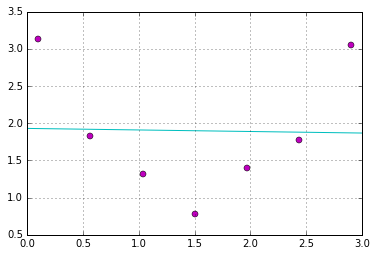

In [15]:
class LinearRegression:
    
    def __init__(self, x, y):
        
        self.px = (7, 2)
        self.px = np.zeros(self.px)
        self.px[:, 0] = 1
        self.px[:, 1] = x
        
        self.y = y
        self.ndata = len(self.px)

    def cost(self, w):
        sum1 = 0.0
        oneover2n = (0.5*1/float(self.ndata))
        
        for i in xrange(self.ndata):
            sum1 += (np.dot(w, self.px[i]) - self.y[i])**2
        sum1 *= oneover2n
        return sum1

    def drawline(self):
        print 'sw',self.w
        x = np.linspace(0, 3, 100)
        y = self.w[0]+(self.w[1]*x)
        
        plt.plot(x, y, 'c')
    
    def set_w(self, w):
        self.w = w

l = LinearRegression(x, y)
res = minimize(l.cost, [0, 0])
print 'minimize', res.x
plt.plot(x, y, 'mo')
plt.grid(True)
l.set_w(res.x)
l.drawline()

minimize for para [ 3.41431539 -3.25023541  1.07650544]
minimize for poly [  4.61410877 -19.2922266   51.27164626 -64.93728715  40.2357914
 -11.84102241   1.32792024]
minimize for poly2 [  2.92004492e+00  -1.16904357e+00  -5.98937274e-01   2.26294143e-02
   3.19592964e-01  -7.56444661e-02   1.50481124e-03]


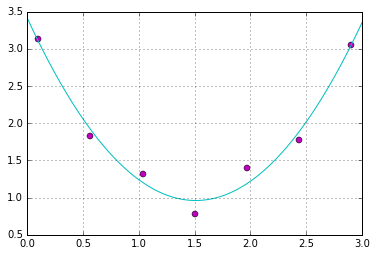

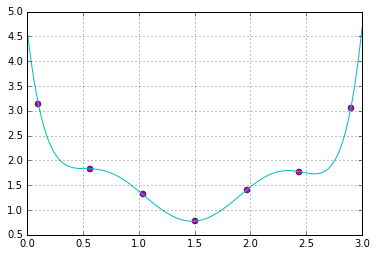

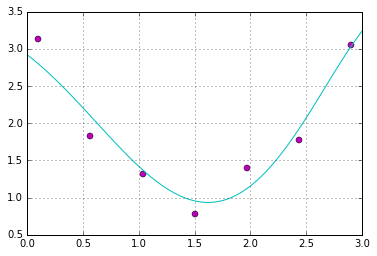

In [48]:
def toPara(x):
    ret = (len(x), 3)
    ret = np.zeros(ret)
    
    ret[:, 0] = 1
    ret[:, 1] = x
    ret[:, 2] = x**2
    return ret

def toPoly(x):
    ret = (len(x), 7)
    ret = np.zeros(ret)
    
    ret[:, 0] = 1
    ret[:, 1] = x
    ret[:, 2] = x**2
    ret[:, 3] = x**3
    ret[:, 4] = x**4
    ret[:, 5] = x**5
    ret[:, 6] = x**6

    return ret

class LinearRegression:
    
    def __init__(self, x, y):
        self.px = x
        self.y = y
        self.ndata = len(self.px)

    def cost(self, w):
        sum1 = 0.0
        sum2 = 0.0
        
        oneover2n = (0.5*1/float(self.ndata))
        
        for i in xrange(self.ndata):
            sum1 += (np.dot(w, self.px[i]) - self.y[i])**2
        sum1 *= oneover2n
            
        for i in range(1, len(w)):
            sum2 += w[i]**2
            
        sum2 *= self.lamb
        
        return sum1 + sum2

    def drawlinepara(self):
        x = np.linspace(0, 3, 100)
        y = self.w[0]+(self.w[1]*x) + (self.w[2]*(x**2))
        
        plt.plot(x, y, 'c')
        
    
    def drawlinepoly(self):
        x = np.linspace(0, 3, 100)
        y = self.w[0] + (self.w[1]*x) + (self.w[2]*(x**2)) + (self.w[3]*(x**3)) + (self.w[4]*(x**4)) +(self.w[5]*(x**5)) + (self.w[6]*(x**6))
        
        plt.plot(x, y, 'c')
        
    def set_w(self, w):
        self.w = w
        
    def set_lamb(self, lamb):
        self.lamb = lamb
        

l = LinearRegression(toPara(x), y)
l.set_lamb(0)
res = minimize(l.cost, [0, 0, 0])
print 'minimize for para', res.x
plt.plot(x, y, 'mo')
plt.grid(True)
l.set_w(res.x)
l.drawlinepara()
######################
plt.figure()
plt.plot(x, y, 'mo')
plt.grid(True)
l2 = LinearRegression(toPoly(x), y)
l2.set_lamb(0)
res2 = minimize(l2.cost, [0, 0, 0, 0, 0, 0, 0])
print 'minimize for poly', res2.x
l2.set_w(res2.x)
l2.drawlinepoly()

######################
plt.figure()
plt.plot(x, y, 'mo')
plt.grid(True)
l3 = LinearRegression(toPoly(x), y)
l3.set_lamb(0.01)
res3 = minimize(l3.cost, [0, 0, 0, 0, 0, 0, 0])
print 'minimize for poly2', res3.x
l3.set_w(res3.x)
l3.drawlinepoly()

## Equation solver
$$ L = \frac{1}{2n}\sum_{i=1}^n(w^Tx_i-y_i)^2+\lambda\sum_{i=1}^nw_i^2 $$

$$ \frac{\partial}{\partial wi}=0; \frac{2}{2n}\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i) + 2\lambda\sum_{i=1}^n(w_i) = 0 $$
$$  \frac{1}{n}\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i)  = -2\lambda\sum_{i=1}^n(w_i) $$
$$  \frac{\sum_{i=1}^n(w^Tx_i-y_i)\sum_{i=1}^n(x_i)}{2n\sum_{i=1}^n(w_i)} = -\lambda $$



In [66]:
def toPoly(x):
    ret = (len(x), 7)
    ret = np.zeros(ret)
    
    ret[:, 0] = 1
    ret[:, 1] = x
    ret[:, 2] = x**2
    ret[:, 3] = x**3
    ret[:, 4] = x**4
    ret[:, 5] = x**5
    ret[:, 6] = x**6

    return ret

def solve_for_lambda():   
    sum_yreal_predict = 0.0
    sum_px = 0.0
    sum_w = 0.0
    lamb = 0.0
    ndata = 7
    
    x = np.array([ 0.1       ,  0.56666667,  1.03333333,  1.5       ,  1.96666667,
        2.43333333,  2.9       ])
        
    y = np.array([ 3.13640523,  1.83109539,  1.31565158,  0.77591068,  1.40453358,
        1.77338332,  3.05500884])
    
    w = np.array([2.92004492e+00,  -1.16904357e+00,  -5.98937274e-01,   2.26294143e-02, 
         3.19592964e-01,  -7.56444661e-02,   1.50481124e-03])
    
    px = toPoly(x)
    for i in xrange(ndata):
        sum_yreal_predict += (np.dot(w, px[i]) - y[i])
        sum_px += sum(px[:,i])
        
    sum_yreal_predict *= sum_px
    
    for i in xrange(ndata):
        sum_w += w[i]**2
    sum_w *= 2*ndata

    lamb = (sum_yreal_predict/sum_w)
    
    
    return lamb

def solve_for_lambda2():   
    sum_yreal_predict = 0.0
    sum_px = 0.0
    sum_w = 0.0
    lamb = 0.0
    ndata = 7
    
    x = np.array([ 0.1       ,  0.56666667,  1.03333333,  1.5       ,  1.96666667,
        2.43333333,  2.9       ])
        
    y = np.array([ 3.13640523,  1.83109539,  1.31565158,  0.77591068,  1.40453358,
        1.77338332,  3.05500884])
    
    w = np.array([2.92004492e+00,  -1.16904357e+00,  -5.98937274e-01,   2.26294143e-02, 
         3.19592964e-01,  -7.56444661e-02,   1.50481124e-03])
    
    px = toPoly(x)
    for i in xrange(ndata):
        sum_yreal_predict += y[i] - np.dot(w, px[i])
        sum_px += sum(px[:,i])
        
#     print("sum_yreal_predict",sum_yreal_predict)
#     print("sum_px",sum_px)
    sum_yreal_predict *= sum_px
    
    for i in xrange(ndata):
        sum_w += w[i]**2
    sum_w *= 2*ndata

    lamb = (sum_yreal_predict/sum_w)
    
    
    return lamb
print solve_for_lambda()
print solve_for_lambda2()

-3.18958414983e-06
3.18958414983e-06


minimize for poly2 [  3.61908573  -5.85176017   9.70368927 -12.20534073   8.24656589
  -2.61271673   0.31119037]


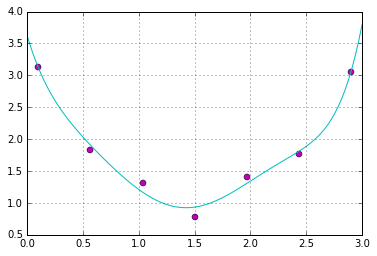

In [64]:
plt.figure()
plt.plot(x, y, 'mo')
plt.grid(True)
l4 = LinearRegression(toPoly(x), y)
l4.set_lamb(3.18958414983e-06)
res4 = minimize(l4.cost, [0, 0, 0, 0, 0, 0, 0])
print 'minimize for poly2', res4.x
l4.set_w(res4.x)
l4.drawlinepoly()